In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn import metrics

from sklearn import datasets

In [3]:
students = pd.read_csv('https://bit.ly/dwp-data-grade')
students_full = pd.read_csv('https://bit.ly/dwp-data-grade-full')
data_bike = pd.read_csv('http://bit.ly/dwp-data-bike')
data_sales = pd.read_csv('http://bit.ly/dwp-data-ecommerce')
data_movies = pd.read_csv('http://bit.ly/dwp-data-movies-sample')
data_ratings = pd.read_csv('http://bit.ly/dwp-data-ratings-sample')
data_survey = pd.read_csv('http://bit.ly/dwp-data-survey')

In [5]:
df_movies = data_movies
df_ratings = data_ratings
df_bike = data_bike
df_sales = data_sales
df_survey = data_survey
df_students = students
df_students_full = students_full

In [6]:
boston_dataset = datasets.load_boston()

In [8]:
x = pd.DataFrame(boston_dataset['data'],columns=boston_dataset['feature_names'])
y = pd.DataFrame(boston_dataset['target'],columns=['prices'])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [13]:
model = LinearRegression()

In [14]:
model.fit(x_train, y_train)

LinearRegression()

In [18]:
list(model.coef_[0])

[-0.11238686745728417,
 0.058058707351496486,
 0.018359355933574982,
 2.12997759973183,
 -19.581101224685906,
 3.0954616570792384,
 0.004452652275657782,
 -1.5004762414744035,
 0.30535896936796464,
 -0.011123087897877262,
 -0.9890075623223039,
 0.0073213001694047986,
 -0.5446449971618539]

In [16]:
model.intercept_

array([42.93352585])

In [20]:
list(x.columns)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

<AxesSubplot:ylabel='columns'>

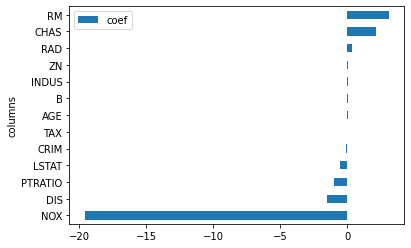

In [30]:
coefs = pd.DataFrame({
    'columns':list(x.columns),
    'coef':list(model.coef_[0])
}).sort_values('coef')
coefs.plot.barh(x='columns',y='coef')

## Supervised Learning

In [31]:
university = pd.read_csv('http://bit.ly/dwp-data-university')

In [41]:
df_university = university
df_university.head()

,GRE,TOEFL,GPA,Research,University Class
0,330,115,9.34,Y,1
1,302,102,8.00,N,0
2,328,116,9.50,Y,1
3,334,119,9.70,Y,1
4,336,119,9.80,Y,1


## Data Transformation

### Categorical > Numerical

## Encoding

In [50]:
df_university.head()

,GRE,TOEFL,GPA,Research,University Class
0,330,115,9.34,Y,1
1,302,102,8.00,N,0
2,328,116,9.50,Y,1
3,334,119,9.70,Y,1
4,336,119,9.80,Y,1


### One Hot Encoding

In [37]:
df_university = pd.get_dummies(df_university,columns=['Research'])

### Label Encoding

In [42]:
df_university['Research'].unique()

array(['Y', 'N'], dtype=object)

In [52]:
def convert_research(row):
    if row['Research'] == 'Y':
        return 1
    return 0
df_university['Research_Num'] = df_university.apply(convert_research,axis=1)

In [55]:
df_university.head()

,GRE,TOEFL,GPA,Research,University Class,Research_Num
0,330,115,9.34,Y,1,1
1,302,102,8.00,N,0,0
2,328,116,9.50,Y,1,1
3,334,119,9.70,Y,1,1
4,336,119,9.80,Y,1,1


### Normalization / Standardization

In [ ]:
# normalization > merubah range data sehingga memiliki 0-1
# stardization > merubah range data sehingga memiliki mean = 0, std = 1

In [66]:
# scale the data
scaler = MinMaxScaler()

x_train_after = scaler.fit_transform(x_train)

In [67]:
x_train.head()

,GRE,TOEFL,GPA,Research_Num
82,303,98,7.65,0
46,331,115,9.36,1
44,334,117,9.07,1
42,298,99,7.46,0
85,300,98,8.02,0


In [70]:
pd.DataFrame(x_train_after, columns=['GRE', 'TOEFL', 'GPA', 'Research_Num'])

,GRE,TOEFL,GPA,Research_Num
0,0.26,0.214286,0.166052,0.0
1,0.82,0.821429,0.797048,1.0
2,0.88,0.892857,0.690037,1.0
3,0.16,0.250000,0.095941,0.0
4,0.20,0.214286,0.302583,0.0
...,...,...,...,...
79,0.18,0.071429,0.051661,0.0
80,0.82,0.714286,0.959410,1.0
81,0.66,0.571429,0.568266,1.0
82,0.28,0.464286,0.110701,0.0


<AxesSubplot:ylabel='Frequency'>

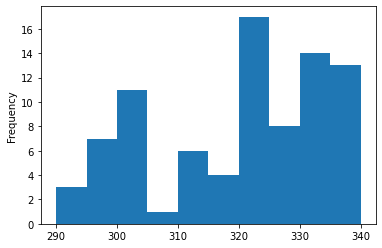

In [73]:
#contoh distribusi sebelum normalisasi/standardization
x_train['GRE'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

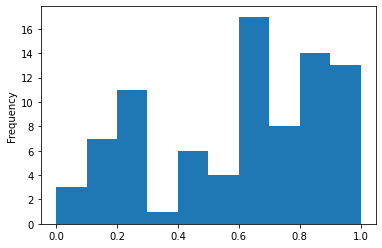

In [74]:
#setelah normalization/standardization
pd.DataFrame(x_train_after, columns=['GRE', 'TOEFL', 'GPA', 'Research_Num'])['GRE'].plot.hist()

### Logictic Regression

In [57]:
#define parameters and labels
x = df_university[['GRE','TOEFL','GPA','Research_Num']]
y = df_university['University Class']

In [75]:
#split the data into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [76]:
# scale the data
# NOTE
# - scaling dilakukan setelah split data dan sebelum training
# - scaling x_train dan x_test dipisah

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [81]:
model = LogisticRegression()

In [83]:
model.fit(x_train,y_train)

LogisticRegression()

In [84]:
y_pred = model.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score {}',format(accuracy))

Accuracy Score {} 0.8636363636363636


In [94]:
model.coef_

array([[ 0.23129478,  1.31519417,  1.86534367, -0.11061536]])

In [87]:
model.intercept_

array([1.51227748])

In [88]:
model.predict_proba(x_test)

array([[0.02705788, 0.97294212],
       [0.04370904, 0.95629096],
       [0.96374655, 0.03625345],
       [0.03097918, 0.96902082],
       [0.10764339, 0.89235661],
       [0.04291142, 0.95708858],
       [0.02157358, 0.97842642],
       [0.00721126, 0.99278874],
       [0.00999071, 0.99000929],
       [0.04834136, 0.95165864],
       [0.6869026 , 0.3130974 ],
       [0.09734778, 0.90265222],
       [0.40965632, 0.59034368],
       [0.00260617, 0.99739383],
       [0.60813775, 0.39186225],
       [0.04504733, 0.95495267],
       [0.0253039 , 0.9746961 ],
       [0.95912311, 0.04087689],
       [0.9984637 , 0.0015363 ],
       [0.98908052, 0.01091948],
       [0.19140379, 0.80859621],
       [0.02705623, 0.97294377]])

<AxesSubplot:ylabel='columns'>

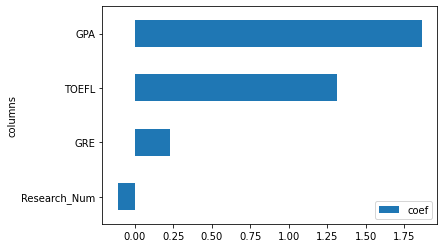

In [95]:
coefs = pd.DataFrame({
    'columns':list(x.columns),
    'coef':list(model.coef_[0])
}).sort_values('coef')
coefs.plot.barh(x='columns',y='coef')

In [97]:
x_train

array([[-1.17559379, -1.37505679, -1.38035188, -1.37715349],
       [ 0.80222924,  0.76625302,  0.71667344,  0.72613547],
       [ 1.01413885,  1.01817182,  0.36103757,  0.72613547],
       [-1.52877647, -1.24909739, -1.61335469, -1.37715349],
       [-1.3875034 , -1.37505679, -0.92660956, -1.37715349],
       [-1.31686686, -1.62697559, -1.49072164, -1.37715349],
       [-0.6105015 , -1.24909739, -0.42381401,  0.72613547],
       [ 0.7315927 ,  1.39605002,  0.96193956,  0.72613547],
       [ 0.02522733,  0.13645602,  0.52046055,  0.72613547],
       [ 0.59031963,  0.89221242,  0.88835972,  0.72613547],
       [-1.17559379, -0.49334098, -0.15402128, -1.37715349],
       [ 0.87286577,  0.38837482, -0.14175798,  0.72613547],
       [ 1.15541192,  0.38837482,  1.20720568,  0.72613547],
       [ 0.51968309, -0.61930039,  0.07898153,  0.72613547],
       [-0.11604574,  0.01049662,  0.4223541 , -1.37715349],
       [ 0.94350231,  1.27009062,  1.23173229,  0.72613547],
       [-0.6105015 , -1.